Import important libraries for the project

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Loading of data 

In [45]:
Dissolution = pd.read_csv('SCCO2 Drug Solubility Dataset1.csv')

In [46]:
Dissolution.head()

,drug,temp,press,mw_drug,mp_drug,rho_scco2,sol,sol_mol_frac
0,Rosuvastatin,308.0,121.6,236.0,435.0,771.0,0.19,0.000023
1,Rosuvastatin,308.0,152.0,236.0,435.0,818.0,0.24,0.000027
2,Rosuvastatin,308.0,182.4,236.0,435.0,850.0,0.33,0.000036
3,Rosuvastatin,308.0,212.8,236.0,435.0,876.0,0.39,0.000041
4,Rosuvastatin,308.0,243.2,236.0,435.0,897.0,0.43,0.000044


In [47]:
Dissolution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   drug          2134 non-null   object 
 1   temp          2134 non-null   float64
 2   press         2134 non-null   float64
 3   mw_drug       2134 non-null   float64
 4   mp_drug       2134 non-null   float64
 5   rho_scco2     2134 non-null   float64
 6   sol           2134 non-null   float64
 7   sol_mol_frac  2134 non-null   float64
dtypes: float64(7), object(1)
memory usage: 133.5+ KB


In [ ]:
Exploratory Data Analysis and Data Clearning

In [48]:
Dissolution.describe()

,temp,press,mw_drug,mp_drug,rho_scco2,sol,sol_mol_frac
count,2134.000000,2134.000000,2134.000000,2134.000000,2134.000000,2134.000000,2134.000000
mean,327.249063,239.008997,323.283704,406.094470,743.578457,2.073952,0.000371
std,14.279248,79.280146,141.700122,105.280469,185.267102,5.072108,0.001135
min,303.000000,80.000000,96.000000,115.000000,3.458823,0.000000,0.000000
25%,318.000000,182.000000,237.000000,369.150000,693.575000,0.070000,0.000011
50%,328.000000,243.000000,289.380000,431.150000,792.000000,0.320500,0.000054
75%,338.000000,304.000000,384.640000,480.000000,858.000000,1.310000,0.000230
max,373.150000,500.000000,853.906000,608.150000,992.000000,43.800000,0.021000


**Data Trends and Insights
Temperature (temp):

Range: 303 K to 373.15 K, with a mean of 327.25 K.
Trend: The temperatures are concentrated around the median (328 K), with moderate variability (standard deviation: 14.28 K). This suggests experiments were conducted under typical supercritical CO2 conditions.
Pressure (press):

**Pressure**
Range: 80 bar to 500 bar, with a mean of 239.01 bar.
Trend: Pressure varies widely, indicating a diverse set of experimental conditions, but the median (243 bar) shows experiments tend to cluster around moderate pressures.
Molecular Weight of Drug (mw_drug):

**Moleular Weight**
Range: 96 to 853.91 g/mol, with a mean of 323.28 g/mol.
Trend: A broad range of molecular weights highlights the inclusion of a wide variety of drugs, with the median (289.38 g/mol) skewed slightly toward smaller molecules.
Melting Point of Drug (mp_drug):
**Melting Point**
Range: 115 K to 608.15 K, with a mean of 406.09 K.
Trend: Moderate variability (standard deviation: 105.28 K) suggests a mix of low and high-melting-point drugs, with many clustered around the median (431.15 K).
Density of SCCO2 (rho_scco2):

**Density**
Range: 3.46 kg/m³ to 992 kg/m³, with a mean of 743.58 kg/m³.
Trend: The density spans a large range, reflecting the impact of pressure and temperature on CO2 density. Most values are concentrated above 690 kg/m³, indicative of typical SCCO2 densities.
Solubility in mg/L (sol):
**Sol**
Range: 0 to 43.8 mg/L, with a mean of 2.07 mg/L.
Trend: Highly skewed distribution, as the 75th percentile (1.31 mg/L) is far below the maximum (43.8 mg/L). This suggests a few drugs exhibit exceptionally high solubility, while most remain at low solubility levels.
Solubility in Mole Fraction (sol_mol_frac):

**Mole fraction solubility**

Range: 0 to 0.021, with a mean of 0.000371.
Trend: Mole fraction solubility is extremely low across the dataset. The highly skewed data distribution (median: 0.000054) suggests that only a few instances reach higher solubility.

In [49]:
Dissolution.isnull()

,drug,temp,press,mw_drug,mp_drug,rho_scco2,sol,sol_mol_frac
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2129,False,False,False,False,False,False,False,False
2130,False,False,False,False,False,False,False,False
2131,False,False,False,False,False,False,False,False
2132,False,False,False,False,False,False,False,False


In [50]:
# Dropping of variables have little impact 
Dissolution= Dissolution.drop(['drug', 'sol'], axis=1,errors='ignore' )


In [51]:
Dissolution.head()

,temp,press,mw_drug,mp_drug,rho_scco2,sol_mol_frac
0,308.0,121.6,236.0,435.0,771.0,0.000023
1,308.0,152.0,236.0,435.0,818.0,0.000027
2,308.0,182.4,236.0,435.0,850.0,0.000036
3,308.0,212.8,236.0,435.0,876.0,0.000041
4,308.0,243.2,236.0,435.0,897.0,0.000044


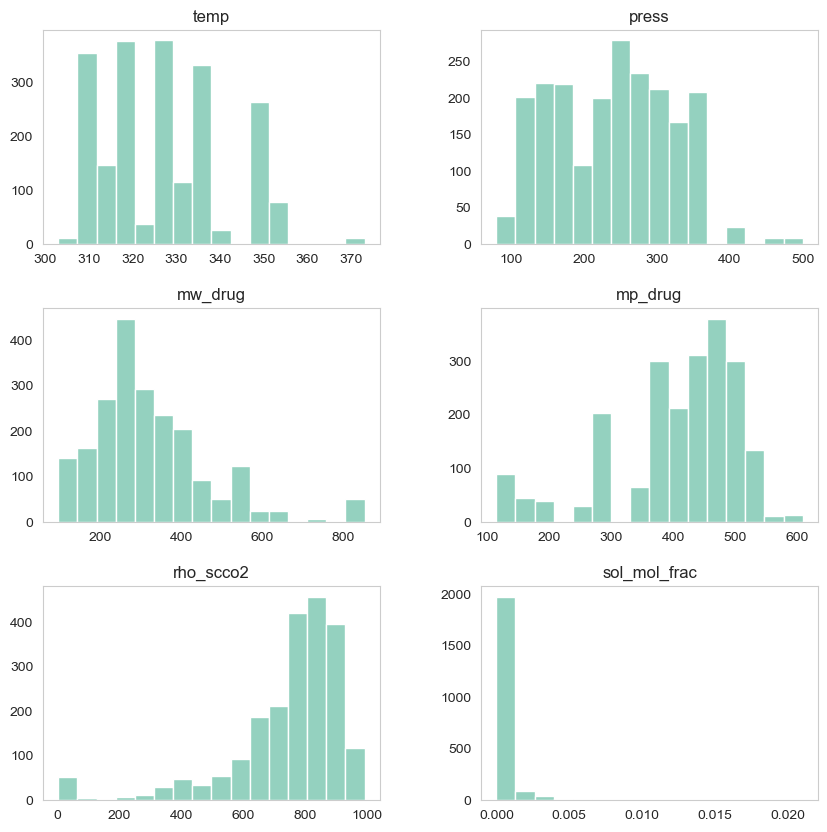

In [52]:
axes = Dissolution.hist(figsize=(10,10), bins=16)
for ax in axes.flatten():
    ax.grid(False)
plt.show()

In [53]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

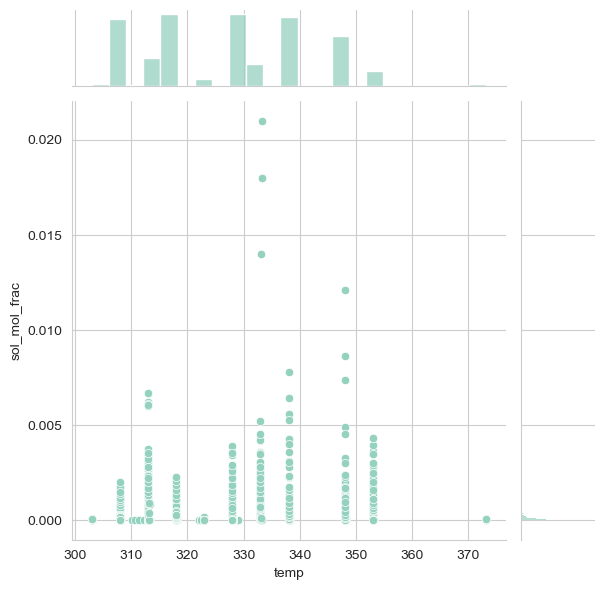

In [54]:

sns.jointplot(x='temp',y='sol_mol_frac',data=Dissolution)

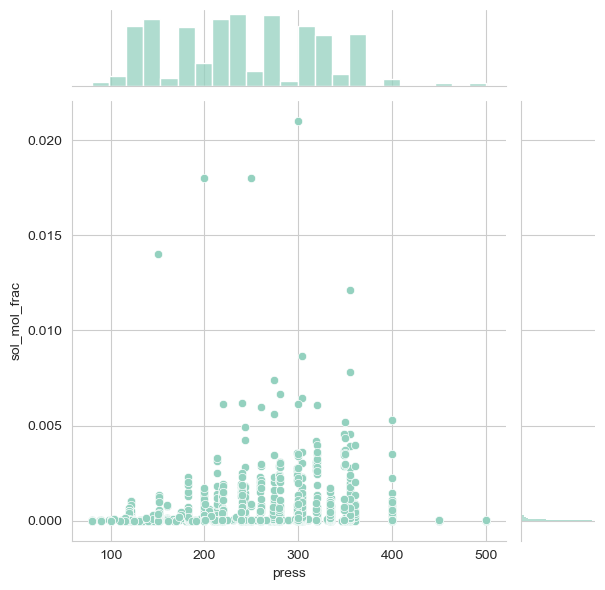

In [55]:
sns.jointplot(x='press',y='sol_mol_frac',data=Dissolution)

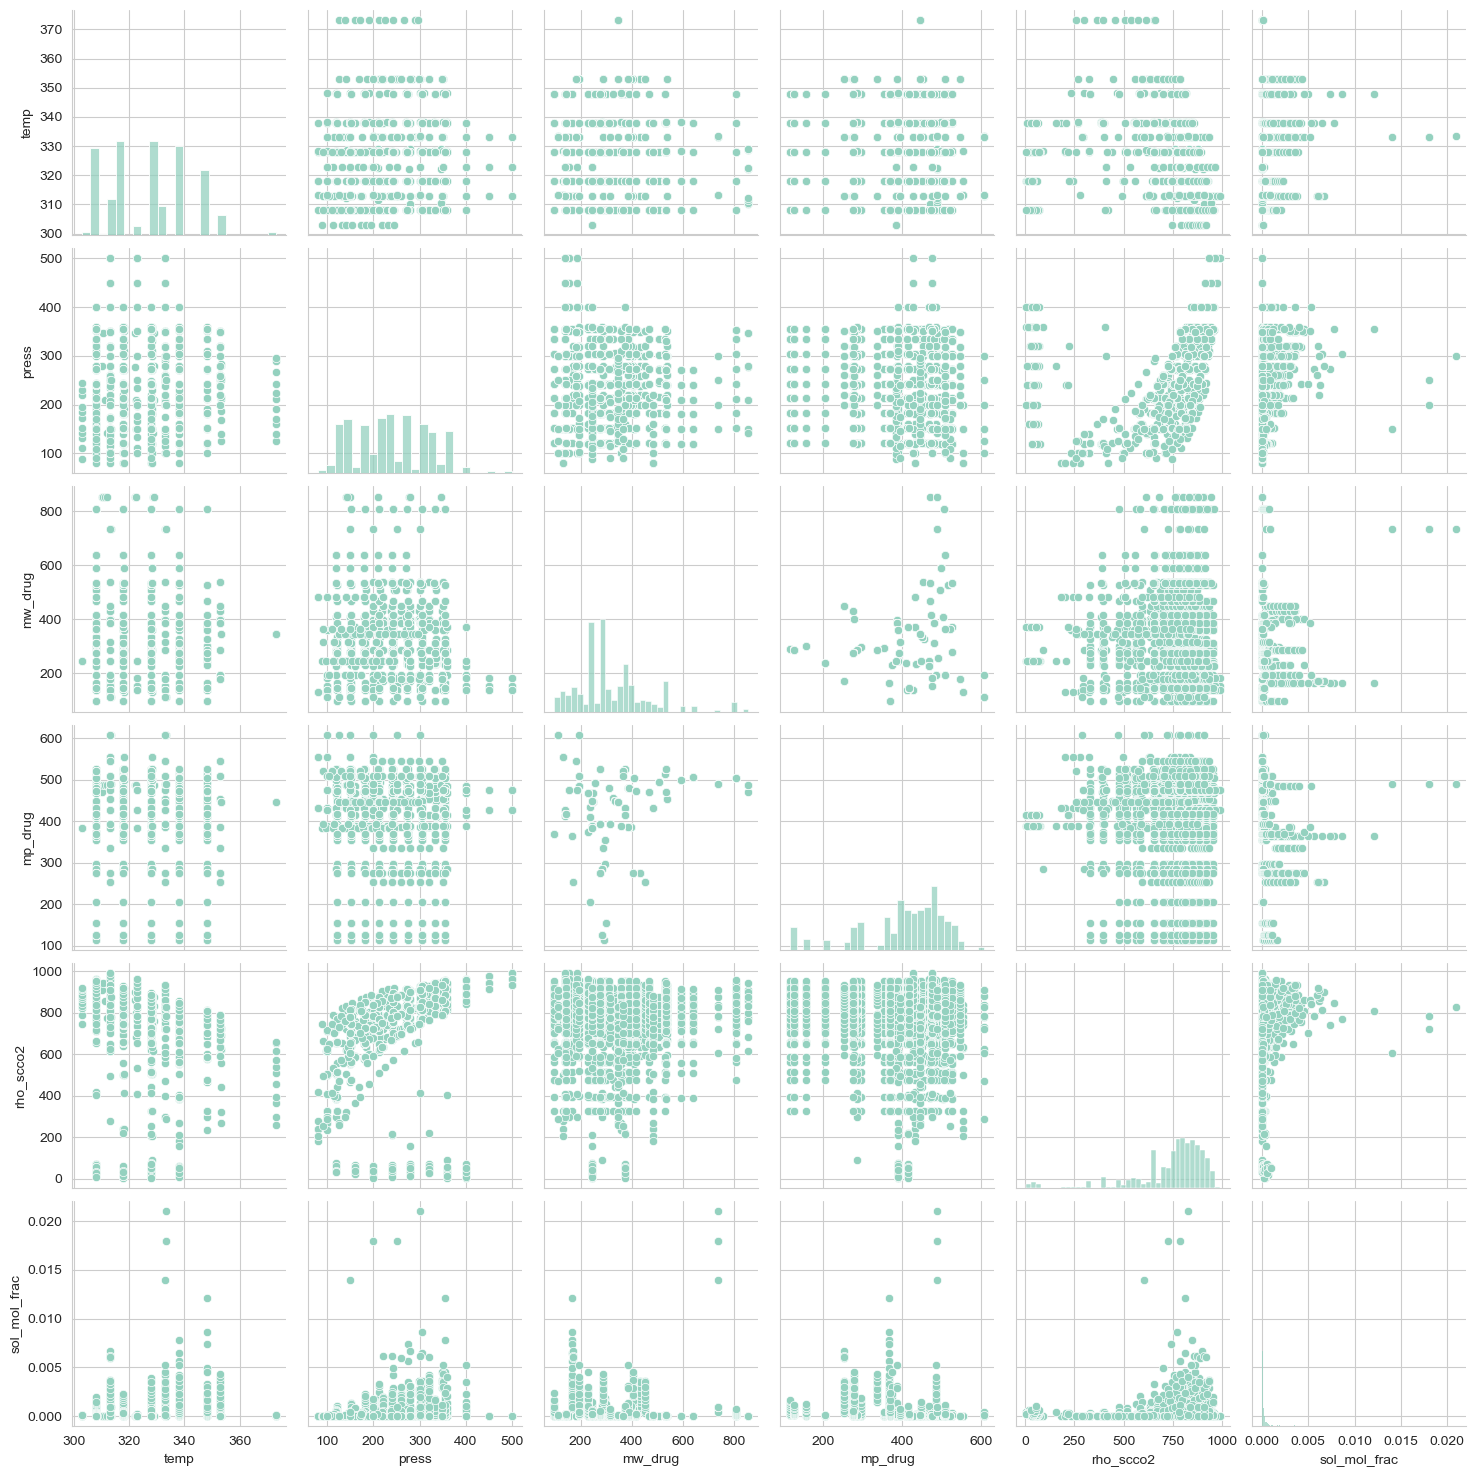

In [56]:
sns.pairplot(Dissolution)

In [57]:
Dissolution.corr()

#sns.heatmap(sns.histplot)

,temp,press,mw_drug,mp_drug,rho_scco2,sol_mol_frac
temp,1.000000,0.034274,-0.004556,-0.066843,-0.366756,0.095379
press,0.034274,1.000000,-0.050634,-0.063696,0.497761,0.165942
mw_drug,-0.004556,-0.050634,1.000000,0.216240,0.012571,0.010982
mp_drug,-0.066843,-0.063696,0.216240,1.000000,-0.014709,-0.155761
rho_scco2,-0.366756,0.497761,0.012571,-0.014709,1.000000,0.082220
sol_mol_frac,0.095379,0.165942,0.010982,-0.155761,0.082220,1.000000


**Variables with positive correlation:

press (0.17): Weak positive correlation.
temp (0.095): Very weak positive correlation.
rho_scco2 (0.082): Very weak positive correlation.

<AxesSubplot:>

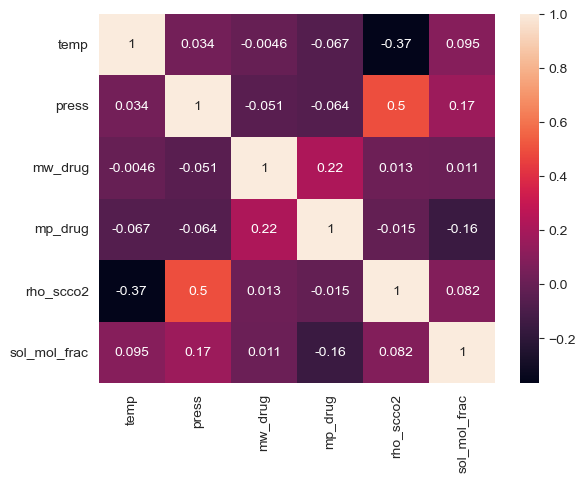

In [58]:
sns.heatmap(Dissolution.corr(),annot=True)

**Train Test Split**
Let's split up the data into a training set and a test set!

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
X = Dissolution.drop('sol_mol_frac',axis=1)
y = Dissolution['sol_mol_frac']

In [97]:
rfc = RandomForestRegressor(n_estimators=100)


In [99]:
rfr = RandomForestRegressor(n_estimators=12, random_state=42)
rfr.fit(X_train, y_train)
rfr.predict(X_test)


array([2.56750000e-04, 1.65833333e-04, 4.07744167e-05, 7.94166667e-04,
       3.72166667e-04, 1.22079417e-05, 7.48333333e-04, 1.65316667e-02,
       1.28675000e-05, 4.06433333e-04, 7.49166667e-05, 2.62416667e-03,
       3.85666667e-06, 7.10833333e-04, 4.63750000e-05, 5.17666667e-06,
       1.80241667e-04, 3.53166667e-04, 6.98833333e-03, 1.73333333e-06,
       1.97750000e-04, 4.24366667e-05, 1.47000000e-03, 6.32500000e-05,
       1.41416667e-04, 2.73833333e-05, 3.25000000e-06, 1.18688333e-05,
       1.05366667e-04, 2.71333333e-05, 1.66158333e-04, 5.95833333e-06,
       3.07250000e-04, 1.27750000e-04, 3.00416667e-03, 5.01666667e-04,
       1.09558333e-04, 5.38333333e-05, 1.76333333e-05, 4.59833333e-05,
       9.58833333e-06, 1.86250000e-04, 1.99166667e-05, 1.80200000e-05,
       2.08333333e-06, 2.28833333e-03, 1.80866667e-04, 4.68416667e-05,
       3.11500000e-03, 3.20266667e-03, 1.92333333e-05, 9.00750000e-05,
       3.08333333e-05, 1.39250000e-03, 8.87158333e-05, 6.33291667e-06,
      

In [101]:
print("R_squared for training set:", round(rfr.score(X_train, y_train),3))#Performance on Training set


R_squared for training set: 0.958


In [111]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Initialize and train the RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=45)
regressor.fit(X_train, y_train)

# Make predictions
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Evaluate the model
print("RandomForestRegressor:")
print("Training MSE:", mean_squared_error(y_train, y_pred_train))
print("Training R²:", r2_score(y_train, y_pred_train))
print("Testing MSE:", mean_squared_error(y_test, y_pred_test))
print("Testing R²:", r2_score(y_test, y_pred_test))


RandomForestRegressor:
Training MSE: 170.09270663426403
Training R²: 0.98300781068002
Testing MSE: 845.5991577162298
Testing R²: 0.886275633650984
